## 실습 문제: Softmax 활성화 함수 클래스 구현하기
**설명**: Softmax 함수는 로짓(logits)이라 불리는 신경망의 원시 출력 값을 확률 분포로 변환하는 데 사용되는 핵심적인 함수입니다. 다중 클래스 분류 문제 (예를 들어, iris 분류 문제) 에서 각 클래스에 대한 예측 확률을 계산하기 위해 마지막 출력 계층에 주로 사용됩니다. 이번 실습의 목표는 NumPy를 사용하여 `Softmax` 클래스를 구현하고, 수치적 안정성을 고려한 `forward` 메서드를 작성하는 것입니다. 안정화를 위해 지수 함수를 적용하기 전에 입력 `x`의 각 행(샘플)에서 해당 행의 최댓값을 빼줍니다.

$$\text{Softmax}(x_i) = \frac{e^{x_i - \max(\mathbf{x})}}{\sum_{j=1}^{C} e^{x_j - \max(\mathbf{x})}}$$

**요구사항**:
- `Softmax`라는 이름의 클래스를 정의합니다.
- `forward`라는 이름의 메서드를 구현합니다. 이 메서드는 로짓(logits) `x` (NumPy 배열)를 입력으로 받아 확률을 반환합니다.
- `forward` 메서드 내에서 다음 단계를 순서대로 구현하세요:
    1. 수치적 안정성을 위해 입력 `x`의 각 행(row)에서 해당 행의 최댓값을 빼줍니다. (`np.max`의 `axis=1`과 `keepdims=True` 옵션을 활용하세요.)
    2. 안정화된 값에 `np.exp()`를 적용하여 지수를 계산합니다.
    3. 각 행의 지수 합을 계산합니다. (정규화를 위한 분모)
    4. 각 행의 지수 값을 해당 행의 지수 합으로 나누어 최종 확률을 계산하고 반환합니다.
- `Softmax` 클래스의 인스턴스를 생성하고, 예제 붓꽃(Iris) 로짓을 `forward` 메서드에 전달하여 결과를 출력합니다.

In [ ]:
import numpy as np

x = [
    [1,2,3,4,5],
    [6,7,8,9,10],
    [11,12,13,14,15]
]

for i, row in enumerate(x) :
    x[i] = np.exp(x[i] - np.max(row))
    x[i] /= np.sum(x[i])
    print(sum(x[i]))

print(x)

0.1047544954443102
0.03928293579161633
0.024174114333302358
[array([0.00122104, 0.00331914, 0.00902235, 0.0245253 , 0.06666667]), array([0.00045789, 0.00124468, 0.00338338, 0.00919699, 0.025     ]), array([0.00028178, 0.00076595, 0.00208208, 0.00565968, 0.01538462])]


In [ ]:

import numpy as np

class Softmax:
    def forward(self, x: np.ndarray) -> np.ndarray:
        """
        Softmax 함수의 forward pass를 계산합니다.

        Args:
            x: 로짓(logits) 값 (N, C) 형태의 NumPy 배열.
               N은 배치 크기(샘플 수), C는 클래스 수.

        Returns:
            각 클래스에 대한 확률 (N, C) 형태의 NumPy 배열.
        """

        # TODO: 수치적으로 안정적인 Softmax 함수를 구현하세요.
        # 1. 각 행의 최댓값을 뺍니다 (안정성).
        # 2. 지수 함수(np.exp)를 적용합니다.
        # 3. 각 행의 합을 구합니다 (정규화 항).
        # 4. 각 요소를 해당 행의 합으로 나눕니다.
        c = np.max(x, axis=1, keepdims=True) # 이렇게 하면 N, 1 짜리 최댓값 배열 생성
        
        bunja = np.exp(x - c) # 이러면 N, 1 짜리이기 때문에 브로드캐스팅으로 x[i]의 각 원소 모두에 - c[i]
        bunmo = np.sum(bunja, axis=1, keepdims=True) # axis = 1이면 행끼리 연산

        return bunja / bunmo
        
        # pass # 이 pass 문을 삭제하고 코드를 구현하세요.


In [12]:
# --- 예제 실행 코드 ---

# Softmax 클래스의 인스턴스 생성
softmax_layer = Softmax()

# 예제 로짓 (2개의 샘플, 3개의 붓꽃 클래스 [Setosa, Versicolor, Virginica])
# (Batch N=2, Classes C=3)
logits = np.array([
    [1.0, 2.0, 3.0],  # 첫 번째 샘플의 로짓 (Virginica일 확률이 높음)
    [2.0, 1.0, 0.5]   # 두 번째 샘플의 로짓 (Setosa일 확률이 높음)
])

# forward 메서드 호출
probabilities = softmax_layer.forward(logits)

print("입력 로짓:")
print(logits)
print("\nSoftmax 확률:")
print(probabilities)
print("\n각 행의 합 (1.0이 되어야 함):")
print(np.sum(probabilities, axis=1))

입력 로짓:
[[1.  2.  3. ]
 [2.  1.  0.5]]

Softmax 확률:
[[0.09003057 0.24472847 0.66524096]
 [0.62853172 0.2312239  0.14024438]]

각 행의 합 (1.0이 되어야 함):
[1. 1.]


In [ ]:
import matplotlib.pyplot as plt

label_map = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}

class_names = list(label_map.keys())
plt.bar(class_names, probabilities[1])

## 실습 문제: 크로스 엔트로피 손실 함수 구현하기
**설명**: 분류 문제에서 자주 사용되는 크로스 엔트로피(Cross-Entropy) 손실 함수를 구현합니다. 이 함수는 모델이 예측한 확률 분포($\hat{y}$)가 실제 레이블의 확률 분포($y$)와 얼마나 다른지를 측정합니다. 이 실습에서는 NumPy를 사용하여 단일 샘플에 대한 크로스 엔트로피 공식을 직접 코드로 작성합니다.

$$L_{CE}(y, \hat{y}) = -\sum_{i=1}^{C} y_i \log(\hat{y}_i)$$

**요구사항**:
- `cross_entropy` 함수를 완성하세요. 이 함수는 `y_true` (실제 레이블, 원-핫 벡터)와 `y_pred` (모델의 예측 확률)를 NumPy 배열로 받습니다.
- 수치적 안정성을 위해 `np.log()`를 계산하기 전에 예측값 `y_pred`에 아주 작은 값(예: `1e-9`)을 더합니다.
- NumPy의 `np.sum()`과 `np.log()` 함수를 사용하여 크로스 엔트로피 공식을 구현하세요.
- 제공된 예제 입력을 사용하여 함수를 호출하고, 계산된 손실 값을 출력하여 결과를 확인합니다.
- 배치 처리가 필요한 경우, 손실 값의 평균을 반환합니다.



In [14]:
import numpy as np

def cross_entropy(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    단일 샘플에 대한 크로스 엔트로피 손실을 계산합니다.

    Args:
        y_true: 실제 레이블 (원-핫 인코딩된 NumPy 배열).
        y_pred: 모델의 예측 확률 (NumPy 배열).

    Returns:
        계산된 크로스 엔트로피 손실 값 (float).
    """
    # np.log(0)을 방지하기 위해 작은 epsilon 값을 더합니다.
    epsilon = 1e-9

    # TODO: 크로스 엔트로피 손실 공식을 구현하세요.
    # 힌트: y_true * np.log(y_pred + epsilon)의 합을 구한 뒤 부호를 변경합니다.
    CEE = -np.sum(y_true * np.log(y_pred + epsilon))
    return CEE
    pass


In [16]:
# --- 예제 실행 코드 ---

# 붓꽃(Iris) 데이터셋에는 3개의 클래스(Setosa, Versicolor, Virginica)가 있다고 가정합니다.

# 예제
# 실제 레이블 (예: 'Versicolor'가 정답)
y_true_example_1 = np.array([[0, 1, 0], [1, 0, 0]])
# 모델의 예측 확률 (예: [Setosa=0.1, Versicolor=0.7, Virginica=0.2])
y_pred_example_1 = np.array([[0.1, 0.7, 0.2], [0.6, 0.2, 0.2]])

# 함수 호출 및 결과 출력
loss_result = cross_entropy(y_true_example_1, y_pred_example_1)
print(f"손실: {loss_result}")

손실: 0.8675005646094852


## 실습 문제: 수치적 미분 (중심 차분) 구현하기
**설명**: 수치적 미분은 함수의 도함수(기울기)를 수학적 정의를 이용해 근사하는 방법입니다. $h$를 매우 작은 값(예: $10^{-5}$)으로 설정할 때, **중심 차분 공식(Central Difference Formula)**은 $f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}$ 로 정의됩니다. 이 방법은 $f(x)$의 도함수 공식을 직접 유도하지 않고도 기울기를 계산할 수 있게 해줍니다. 본 실습의 목표는 $f(x) = (x-5)^2 + 3$ 함수에 대해 이 중심 차분 공식을 구현하는 것입니다.

$$f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}$$

**요구사항**:
- `f` 함수에 $f(x) = (x-5)^2 + 3$ 공식을 구현하세요.
- `numerical_derivative` 함수를 완성하세요. $h=1e-5$를 사용하여 중심 차분 공식을 구현해야 합니다.
- 제공된 코드를 실행하여 $x=10$일 때의 수치적 미분 값을 계산하고, 이 값이 해석적 미분 결과(10.0)와 거의 일치하는지 확인하세요.



In [28]:
def f(x: float) -> float:
    """
    f(x) = (x-5)^2 + 3 함수를 계산합니다.
    """
    # TODO: 이 함수를 완성하세요.
    return (x-5)**2 + 3

def numerical_derivative(func, x: float) -> float:
    """
    중심 차분 공식을 사용하여 x에서의 func의 수치적 미분 값을 계산합니다.
    func: 미분할 함수 (이 실습에서는 f 함수)
    x: 미분 값을 계산할 지점
    """
    h = 1e-5 # 0.00001

    # TODO: 중심 차분 공식을 구현하세요.
    # f'(x) ≈ (f(x+h) - f(x-h)) / (2h)
    grad = (f(x+h) - f(x-h)) / 2 / h

    return grad

In [29]:
# x=10 에서의 미분 값 계산 및 출력
x_val = 10.0

# 1. f(x) 함수가 올바르게 구현되었는지 확인
# f(10) = (10-5)^2 + 3 = 5^2 + 3 = 25 + 3 = 28
print(f"f({x_val}) = {f(x_val)}")

# 2. 수치적 미분 함수를 호출하여 결과 확인
derivative_at_10 = numerical_derivative(f, x_val)

print(f"\n--- At x = {x_val} ---")
print(f"Numerical Derivative: {derivative_at_10}")

# 참고: 해석적 미분(Analytical Derivative) 결과는 10.0 입니다.
# f'(x) = 2(x-5)
# f'(10) = 2(10-5) = 2 * 5 = 10
print(f"Analytical Derivative (for comparison): 10.0")

f(10.0) = 28.0

--- At x = 10.0 ---
Numerical Derivative: 9.999999999621423
Analytical Derivative (for comparison): 10.0


## 실습 문제: 수치적 미분을 이용한 경사 하강법 구현
**설명**: 경사 하강법(Gradient Descent)은 함수의 기울기(gradient)를 이용해 함수의 최솟값을 찾아가는 반복적 최적화 알고리즘입니다. 이 알고리즘은 $x \leftarrow x - \text{learning\_rate} \cdot f'(x)$ 업데이트 규칙을 반복적으로 적용합니다.

본 실습의 목표는 $f'(x)$(기울기)를 계산하기 위해, 이전에 배운 **`numerical_derivative` (수치적 미분) 함수를 호출**하는 `gradient_descent` 함수를 완성하는 것입니다. $f(x) = (x-5)^2 + 3$ 함수의 최솟값(x=5)을 $x=15$에서부터 찾아가 봅니다.

$$x_{t+1} = x_t - \alpha \cdot f'(x_t)$$

(여기서 $\alpha$는 학습률(learning\_rate)이며, $f'(x_t)$는 `numerical_derivative(f, x_t)`를 통해 계산합니다.)

**요구사항**:
- `gradient_descent` 함수를 완성하세요.
- 함수 내부의 `for` 루프에서, 제공된 `numerical_derivative` 함수를 호출하여 현재 `x`의 기울기 `grad`를 계산하세요. (인자로 `f`와 현재 `x` 값을 전달해야 합니다.)
- $x \leftarrow x - \text{lr} \cdot \text{grad}$ 공식을 사용해 `x` 값을 업데이트하고, `history` 리스트에 갱신된 `x` 값을 추가하세요.
- 제공된 시각화 코드를 실행하여, 점들이 $x=15$에서 시작하여 $x=5$를 향해 이동하는지 확인합니다.




In [32]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(f, init_x: float, lr: float, epochs: int) -> list[float]:
    """
    수치적 미분을 사용하여 경사 하강법을 수행합니다.
    f: 최소화할 원본 함수 (numerical_derivative에 전달됨)
    init_x: 시작 x 값
    lr: 학습률
    epochs: 반복 횟수
    """
    history: list[float] = [init_x]
    x: float = init_x

    for _ in range(epochs):
        # TODO 1: numerical_derivative를 호출하여 기울기(grad)를 계산하세요.
        # 힌트: 'f' 함수와 현재 'x' 값을 인자로 전달해야 합니다.
        grad = numerical_derivative(f, x)

        # TODO 2: 경사 하강법 업데이트 공식을 적용하여 x 값을 갱신하세요.
        # (x_new = x_old - lr * grad)
        x = x - lr * grad
        pass # 이 pass를 지우고 업데이트 코드를 작성하세요.

        # 갱신된 x 값을 history에 추가합니다.
        history.append(x)

    return history


경사 하강법 완료. 20회 반복 후 x 값: 5.115292150483217


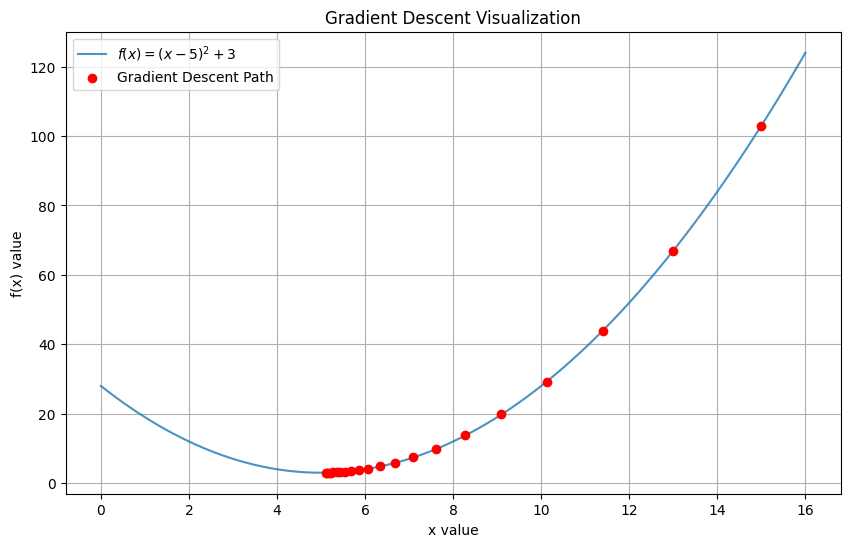

In [33]:
# --- 하이퍼파라미터 설정 ---
start_x = 15.0       # 시작 x 값
learning_rate = 0.1  # 학습률
epochs = 20      # 반복 횟수

# 경사 하강법 실행
history = gradient_descent(f, start_x, learning_rate, epochs)

# --- 시각화 코드 ---
print(f"경사 하강법 완료. {epochs}회 반복 후 x 값: {history[-1]}")

# 1. 원본 함수 그래프 그리기
x_range = np.linspace(0, 16, 100)
y_range = f(x_range)

plt.figure(figsize=(10, 6))
plt.plot(x_range, y_range, label="$f(x) = (x-5)^2 + 3$", alpha=0.8)

# 2. 경사 하강법 진행 과정(history) 시각화하기
history_np = np.array(history)
history_y = f(history_np)

plt.scatter(history_np, history_y, color='red', label="Gradient Descent Path", zorder=5)

plt.title("Gradient Descent Visualization")
plt.xlabel("x value")
plt.ylabel("f(x) value")
plt.legend()
plt.grid(True)